<a href="https://colab.research.google.com/github/Sanskruti-Shete/CNN-ML-Models/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, Y_train),(X_test, Y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

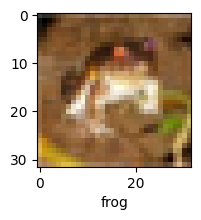

In [ ]:
plot_sample(X_train,Y_train,0)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 34ms/step - accuracy: 0.3732 - loss: 1.7212
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.5727 - loss: 1.2069
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6302 - loss: 1.0566
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6642 - loss: 0.9689
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6863 - loss: 0.9027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 38ms/step - accuracy: 0.7070 - loss: 0.8464
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 33ms/step - accuracy: 0.7238 - loss: 0.7961
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.7352 - loss: 0.7590
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.7478 - loss: 0.7270
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.7584 - loss: 0.6842


In [ ]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6943 - loss: 0.8955


[0.9084206819534302, 0.6901000142097473]

In [ ]:
Y_test=Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

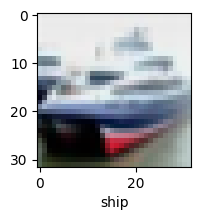

In [ ]:
plot_sample(X_test, Y_test, 1)

In [ ]:
Y_pred=cnn.predict(X_test)
Y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[2.3189783e-03, 8.9012341e-05, 5.7895207e-03, 8.9163411e-01,
        4.2586087e-04, 8.7529354e-02, 6.5753567e-03, 1.9699139e-04,
        5.3871684e-03, 5.3564381e-05],
       [3.8473960e-02, 1.6102871e-02, 1.0815957e-05, 5.2999180e-06,
        8.6948234e-07, 9.7049027e-09, 2.6513391e-07, 9.3182964e-09,
        9.4510055e-01, 3.0530279e-04],
       [2.0761755e-01, 3.0941865e-01, 2.2734497e-03, 4.1040007e-02,
        4.5495084e-03, 1.3404210e-03, 1.2870312e-03, 6.0424684e-03,
        3.9175516e-01, 3.4675755e-02],
       [8.4271425e-01, 6.1922343e-03, 1.2808198e-02, 1.3851400e-03,
        2.4912646e-02, 4.0477931e-05, 1.4262077e-03, 1.8126906e-04,
        1.1012495e-01, 2.1462236e-04],
       [4.5916217e-06, 3.5285923e-06, 1.7505886e-02, 1.5683107e-02,
        3.6837870e-01, 4.7014956e-03, 5.9368491e-01, 2.4950969e-05,
        1.2054677e-05, 8.1803586e-07]], dtype=float32)

In [ ]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [ ]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

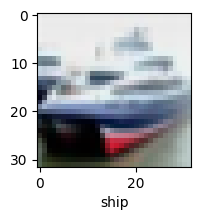

In [ ]:
plot_sample(X_test, Y_test, 1)

In [ ]:
classes[Y_classes[1]]

'ship'

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report: \n", classification_report(Y_test, Y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.84      0.78      0.81      1000
           2       0.64      0.53      0.58      1000
           3       0.51      0.46      0.48      1000
           4       0.57      0.68      0.62      1000
           5       0.58      0.62      0.60      1000
           6       0.73      0.79      0.76      1000
           7       0.74      0.74      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

